In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [20]:
data=pd.read_csv('Mall_Customers.csv')

In [21]:
data.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [23]:
num_to_cat=pd.get_dummies(data.Genre)

In [24]:
final_data=pd.concat([data,num_to_cat],axis=1)

In [25]:
final_data=final_data.drop(['Genre','Male'],axis=1)

In [26]:
x=data.iloc[:,[3,4]].values

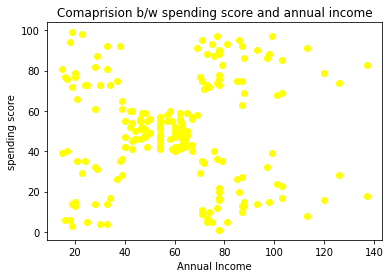

In [27]:
plt.scatter(data['Annual Income (k$)'],data['Spending Score (1-100)'],c='yellow')
plt.xlabel('Annual Income')
plt.ylabel('spending score')
plt.title('Comaprision b/w spending score and annual income')
plt.show()

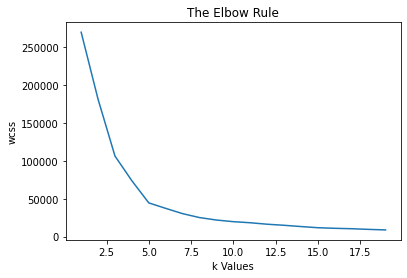

In [28]:
from sklearn.cluster import KMeans
wcss=[]
for i in range(1,20):
    Kmeans=KMeans(n_clusters=i,init='k-means++',max_iter=300,n_init=10)
    Kmeans.fit(x)
    wcss.append(Kmeans.inertia_)
plt.plot(range(1,20),wcss)
plt.title('The Elbow Rule')
plt.xlabel('k Values')
plt.ylabel('wcss')
plt.show()

In [33]:
Kmeans=KMeans(n_clusters=5,init='k-means++',max_iter=100,n_init=10)
y_kmeans=Kmeans.fit_predict(x)

In [34]:
y_kmeans

array([1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3,
       1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 4,
       1, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 0, 2, 0, 4, 0, 2, 0, 2, 0,
       4, 0, 2, 0, 2, 0, 2, 0, 2, 0, 4, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0,
       2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0,
       2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0,
       2, 0])

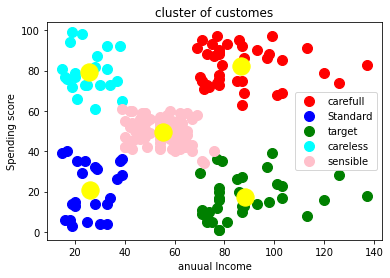

In [37]:
plt.scatter(x[y_kmeans==0,0],x[y_kmeans==0,1],s=100,c='red',label="carefull")
plt.scatter(x[y_kmeans==1,0],x[y_kmeans==1,1],s=100,c='blue',label='Standard')
plt.scatter(x[y_kmeans==2,0],x[y_kmeans==2,1],s=100,c='green',label='target')
plt.scatter(x[y_kmeans==3,0],x[y_kmeans==3,1],s=100,c='cyan',label='careless')
plt.scatter(x[y_kmeans==4,0],x[y_kmeans==4,1],s=100,c='pink',label='sensible')
plt.scatter(Kmeans.cluster_centers_[:,0],Kmeans.cluster_centers_[:,1],s=300,c="yellow")
plt.title('cluster of customes')
plt.xlabel('anuual Income')
plt.ylabel('Spending score')
plt.legend()
plt.show()